# CSE 6367 Programming Assignment 2 (P2)

## Fall 2023

### Task 1 (30 points) 

Implement Hough transform to detect lines in the image. Superimpose detected lines on the original image.

Note: You shouldn't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/lines.jpg>

C:\Users\chand\AppData\Local\Temp\ipykernel_1128\3211375586.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc = np.zeros((len(rs), len(t)), dtype=np.int)


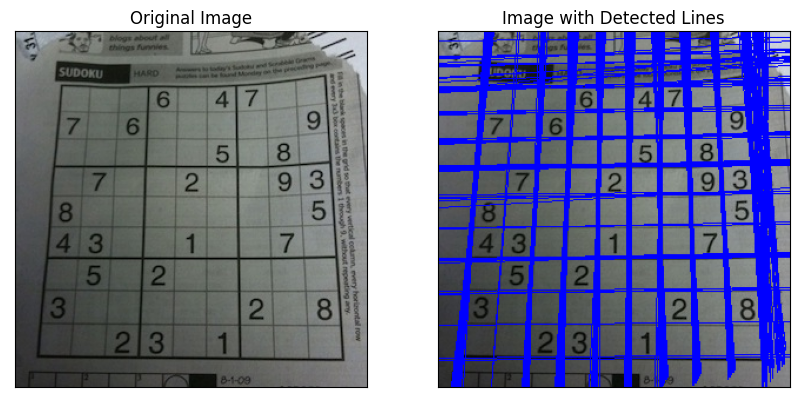

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hough_transf(img):
    # Define the Hough space (r, theta)
    h, w = img.shape
    max_r = int(np.sqrt(h**2 + w**2))
    t = np.deg2rad(np.arange(-90, 90, 0.5))
    rs = np.arange(-max_r, max_r, 1)

    # Initialize acc
    acc = np.zeros((len(rs), len(t)), dtype=np.int)

    # Loop over each edge pixel in the image
    edge_pix = np.argwhere(img > 0)
    for y, x in edge_pix:
        for theta_index in range(len(t)):
            r = int(x * np.cos(t[theta_index]) + y * np.sin(t[theta_index]))
            r_index = np.argmin(np.abs(rs - r))
            acc[r_index, theta_index] += 1

    return acc, rs, t

def draw_detect_lines(image, rs, t):
    for i in range(len(rs)):
        for j in range(len(t)):
            if acc[i, j] > threshold:
                r = rs[i]
                theta = t[j]
                
                # Filter lines based on length and angle
                if np.abs(theta) < np.deg2rad(10) or np.abs(theta - np.pi/2) < np.deg2rad(10):
                    a = np.cos(theta)
                    b = np.sin(theta)
                    x0 = a * r
                    y0 = b * r
                    scale_factor = max(image.shape[0], image.shape[1])
                    x1 = int(x0 + scale_factor * (-b))
                    y1 = int(y0 + scale_factor * (a))
                    x2 = int(x0 - scale_factor * (-b))
                    y2 = int(y0 - scale_factor * (a))
                    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 1)  # Change line thickness to 1 (thin lines)
# Load the image
image = cv2.imread('Images/lines.jpg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform edge detection (you can use any edge detection method)
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Perform Hough Transform
acc, rs, t = hough_transf(edges)

# Set a threshold to identify significant lines
threshold = 100

# Superimpose lines on the original image
image_with_lines = np.copy(image)
draw_detect_lines(image_with_lines, rs, t)

# Display the original image and the image with detected lines
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Lines'), plt.xticks([]), plt.yticks([])
plt.show()


In [2]:
#JUST FOR TESTING PURPOSES
# import numpy as np
# import cv2
# # Read image
# img = cv2.imread('Images/lines.jpg',cv2.IMREAD_COLOR) # road.png is the filename


# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# edges = cv2.Canny(gray, 50, 200)


# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
# #lines = cv2.HoughLinesP(edges, 1, np.pi/180, minLineLength=10, maxLineGap=250)

# for line in lines:
#    x1, y1, x2, y2 = line[0]
#    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# cv2.imshow('lanes',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Task 2 (30 points) 

Implement Hough transform from scratch to detect circles in the image. Refer to this wiki page for pseudocode(https://en.wikipedia.org/wiki/Circle_Hough_Transform). Superimpose detected circles on the original image.

Note: You shouldn't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/circles.jpg>

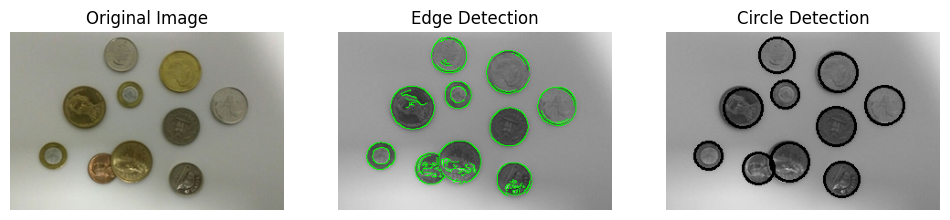

In [3]:


import cv2
import numpy as np
from matplotlib import pyplot as plt


def rmv_con_circles(circles, min_distance):
    final_circles = []
    circles.sort(key=lambda x: x[3], reverse=True)

    i = 0  # Index variable to iterate through the list
    while i < len(circles):
        circle = circles[i]
        x, y, r, _ = circle
        create_circle = True

        j = 0  # Index variable for iterating through final_circles
        while j < len(final_circles):
            fx, fy, fr, fv = final_circles[j]
            distance = np.sqrt((x - fx) ** 2 + (y - fy) ** 2)

            if distance < min_distance:
                create_circle = False
                break

            j += 1  # Increment index variable for final_circles

        if create_circle:
            final_circles.append(circle)

        i += 1  # Increment index variable for circles

    return final_circles


def det_circles(image, min_r, max_r, threshold):
    edges = cv2.Canny(image, 100, 200)
    
    height, width = image.shape
    acc = np.zeros((height, width, max_r - min_r + 1), dtype=np.uint32)

    for y in range(height):
        for x in range(width):
            if edges[y, x] == 255:  # Check if the pixel is an edge pixel (bright in Canny edge map)
                for r in range(min_r, max_r + 1):
                    for theta in range(0, 360):
                        a = int(x - r * np.cos(np.deg2rad(theta)))
                        b = int(y - r * np.sin(np.deg2rad(theta)))

                        if a >= 0 and a < width and b >= 0 and b < height:
                            acc[b, a, r - min_r] += 1

    circles = []
    for r in range(min_r, max_r + 1):
        for y in range(height):
            for x in range(width):
                if acc[y, x, r - min_r] >= threshold:
                    circles.append((x, y, r, acc[y, x, r - min_r]))

    return circles


org_image = cv2.imread("images/circles.jpg")
image = cv2.imread("images/circles.jpg", cv2.IMREAD_GRAYSCALE)
min_r, max_r = 15, 21
threshold = 100
circles = det_circles(image, min_r, max_r, threshold)
min_distance = 30
selected_circles = rmv_con_circles(circles, min_distance)

# Convert the grayscale image to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Draw the edges on the image
edges = cv2.Canny(image, 100, 200, apertureSize=3)
image_with_edges = image_rgb.copy()
image_with_edges[edges != 0] = [0, 255, 0]  # Draw edges in green

# Draw the detected circles on the image
img_with_circles = image_rgb.copy()
for x, y, r, _ in selected_circles:
    cv2.circle(img_with_circles, (x, y), r, (0, 0, 0), 2)

# Display the images side by side
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

plt.subplot(132)
plt.imshow(image_with_edges)
plt.title('Edge Detection')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_with_circles)
plt.title('Circle Detection')
plt.axis('off')

plt.show()



### Task 3 (40 points)

Implement Harris corner detector from scratch. Mark detected corners on original image. 

Note: You shouldn't use cv2.cornerHarris() or any other library functions to detect the corners.

<img src = Images/corners.jpg>

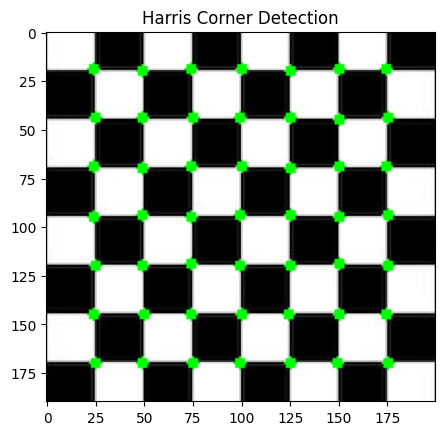

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute gradients using Sobel filters
def cal_grad(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Mean subtraction to remove the DC component
    mean_grad_y = np.mean(grad_y)
    mean_grad_x = np.mean(grad_x)
    grad_y -= mean_grad_y
    grad_x -= mean_grad_x
    

    return grad_x, grad_y

# Function to compute Harris response
def cal_harris_resp(grad_x, grad_y, k=0.04):
    Ixx = grad_x * grad_x
    Iyy = grad_y * grad_y
    Ixy = grad_x * grad_y

    # Apply Gaussian blur to the elements
    blurr_Ixx = cv2.GaussianBlur(Ixx, (5, 5), 0.5)
    blurr_Iyy = cv2.GaussianBlur(Iyy, (5, 5), 0.5)
    blurr_Ixy = cv2.GaussianBlur(Ixy, (5, 5), 0.5)

    # Compute the Harris response
    det = blurr_Ixx * blurr_Iyy - blurr_Ixy * blurr_Ixy
    trace = blurr_Ixx + blurr_Iyy
    harris_response = det - k * trace * trace
    cv2.normalize(harris_response, harris_response, 0, 1, cv2.NORM_MINMAX)

    return harris_response

# Function for non-maximum suppression
def non_max_supp(harris_response, threshold=0.6):
    cand_corners = np.argwhere(harris_response > threshold)
    
    # Apply non-maximum suppression to get the final corners
    supp_window = 1
    corners = []
    i = 0
    while i < len(cand_corners):
        y, x = cand_corners[i]
        window = harris_response[y - supp_window: y + supp_window + 1, 
                                 x - supp_window: x + supp_window + 1]
        if harris_response[y, x] == np.max(window):
            corners.append((x, y))
        i += 1

    return corners

# Load the checkerboard image
input_image = cv2.imread('images/corners.jpg', cv2.IMREAD_GRAYSCALE)

# Compute gradients
grad_x, grad_y = cal_grad(input_image)

# Compute the Harris response
harris_response = cal_harris_resp(grad_x, grad_y)

# Perform non-maximum suppression to find corners
detect_corners = non_max_supp(harris_response)

# Draw the detected corners on the original image
mark_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
i = 0
while i < len(detect_corners):
    x, y = detect_corners[i]
    cv2.circle(mark_image, (x, y), 3, (0, 255, 0), -1)
    i += 1

# Display the original image with corners
plt.imshow(cv2.cvtColor(mark_image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()


## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
